# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random



########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_25_PMTS_Beamlike_PI_120k_Files_mitTopBottom.pickle","rb"))
YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_25_PMTS_Beamlike_PI_120k_Files_mitTopBottom.pickle","rb"))


In [7]:
XLA=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))
YLA=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))


In [2]:
#del X,Y
########### Daten laden ###########
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_10x10_PMT_160_Only_20k_Files_mitTopBottom_mitFill.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_10x10_PMT_160_Only_20k_Files_mitTopBottom_mitFill.pickle","rb"))
#X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_3x3_PMT_160_Only_20k_Files_mitTopBottom_mitFill.pickle","rb"))
#Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_3x3_PMT_160_Only_20k_Files_mitTopBottom_mitFill.pickle","rb"))
#X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_3x3_PMT_160_Only_20k_Files_mitTopBottom_mitSpalten.pickle","rb"))
#Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_3x3_PMT_160_Only_20k_Files_mitTopBottom_mitSpalten.pickle","rb"))
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_1x1_PMT_160_Only_20k_Files_mitTopBottom.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_1x1_PMT_160_Only_20k_Files_mitTopBottom.pickle","rb"))


#X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))
#Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_1x1_PMT_160_120k_Files_mitTopBottom.pickle","rb"))



In [4]:
unique, counts = np.unique(YL, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [59977 60028]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 50.021249114620225


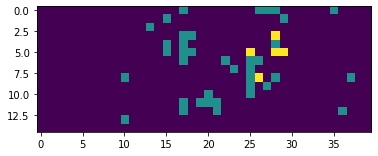

In [30]:
plt.imshow(XLA[40,:,:,0], cmap='viridis', interpolation='None')

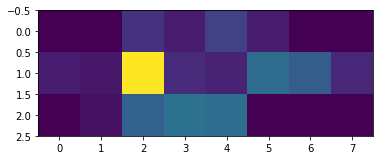

In [29]:
plt.imshow(XL[40,:,:,0], cmap='viridis', interpolation='None')

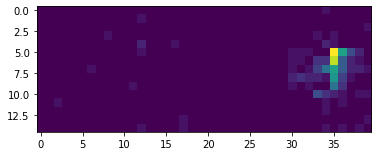

In [8]:
plt.imshow(XLA[10,:,:,0], cmap='viridis', interpolation='None')

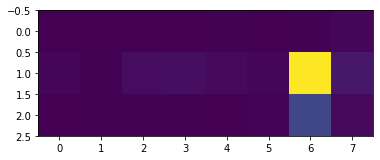

In [6]:
plt.imshow(XL[10,:,:,0], cmap='viridis', interpolation='None')

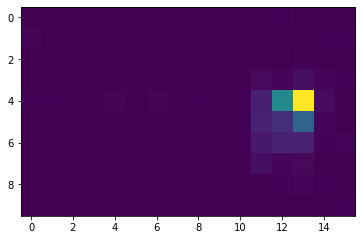

In [4]:
plt.imshow(X[10,:,:,0], cmap='viridis', interpolation='None')

In [4]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(17000, 10, 16, 2) (2500, 10, 16, 2) (4052, 10, 16, 2)


In [5]:
del X,Y,X1,X2,X3,Y1,Y2,Y3

# Testen der besten Methode

# Umsetzung

20 x 16 px und 2 Channel

20 Zeilen 16 Spalten und 2 Channel

In [6]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,10,16,1)
XTestT = XTest[:,:,:,1].reshape(4052,10,16,1)
XValT = XVal[:,:,:,1].reshape(2500,10,16,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,10,16,1)
XTestC = XTest[:,:,:,0].reshape(4052,10,16,1)
XValC = XVal[:,:,:,0].reshape(2500,10,16,1)

In [34]:
#Test
model = tf.keras.models.load_model("CNN_MutiNetwork_PI_PMT_TandC-improvement-val-acc_0.92.model")
score = model.evaluate([XTestC,XTestT], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.2766162261223422
Test accuracy:  0.91880554


# Just Charge

Testen der besten Methode

In [23]:
Tiefe = [0,1,2,3]
Batchgrose = [32,64,128,254]
Breite = [10,50,100,160,600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTrainingC,YTraining,
                              validation_data=(XValC,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 322       
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 127us/sample - loss: 0.6820 - acc: 0.5536 - val_loss: 0.6740 - val_acc: 0.5852
Epoch 2/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.6680 - acc: 0.5840 - val_loss: 0.6664 - val_acc: 0.5932
Epoch 3/30
17000/17000 [==============================] - 1s 78us

17000/17000 [==============================] - 1s 72us/sample - loss: 0.6585 - acc: 0.6053 - val_loss: 0.6601 - val_acc: 0.6008
Epoch 6/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.6577 - acc: 0.6035 - val_loss: 0.6595 - val_acc: 0.6000
Epoch 7/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.6568 - acc: 0.6066 - val_loss: 0.6590 - val_acc: 0.6016
Epoch 8/30
17000/17000 [==============================] - 1s 81us/sample - loss: 0.6566 - acc: 0.6074 - val_loss: 0.6605 - val_acc: 0.6080
Epoch 9/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.6564 - acc: 0.6073 - val_loss: 0.6591 - val_acc: 0.6064
Epoch 10/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6561 - acc: 0.6109 - val_loss: 0.6589 - val_acc: 0.6104
Epoch 11/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.6560 - acc: 0.6083 - val_loss: 0.6595 - val_acc: 0.6128
Epoch 12/30
17000/17000 [===========

17000/17000 [==============================] - 1s 70us/sample - loss: 0.6547 - acc: 0.6101 - val_loss: 0.6595 - val_acc: 0.6080
Epoch 29/30
17000/17000 [==============================] - 1s 70us/sample - loss: 0.6546 - acc: 0.6100 - val_loss: 0.6598 - val_acc: 0.6056
Epoch 30/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6548 - acc: 0.6114 - val_loss: 0.6599 - val_acc: 0.6084
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 160)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 322       
Total params: 322
Trainable params: 322
Non-trainable params: 0
___________________________________________________

17000/17000 [==============================] - 1s 47us/sample - loss: 0.6719 - acc: 0.5804 - val_loss: 0.6715 - val_acc: 0.5788
Epoch 3/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.6661 - acc: 0.5878 - val_loss: 0.6666 - val_acc: 0.5888
Epoch 4/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.6625 - acc: 0.5964 - val_loss: 0.6634 - val_acc: 0.5968
Epoch 5/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.6603 - acc: 0.6003 - val_loss: 0.6619 - val_acc: 0.5984
Epoch 6/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.6590 - acc: 0.6019 - val_loss: 0.6612 - val_acc: 0.6044
Epoch 7/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.6581 - acc: 0.6055 - val_loss: 0.6601 - val_acc: 0.6040
Epoch 8/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6574 - acc: 0.6059 - val_loss: 0.6597 - val_acc: 0.6104
Epoch 9/30
17000/17000 [==============

17000/17000 [==============================] - 1s 46us/sample - loss: 0.6546 - acc: 0.6091 - val_loss: 0.6591 - val_acc: 0.6064
Epoch 26/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.6548 - acc: 0.6110 - val_loss: 0.6590 - val_acc: 0.6052
Epoch 27/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.6546 - acc: 0.6088 - val_loss: 0.6593 - val_acc: 0.6040
Epoch 28/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.6547 - acc: 0.6105 - val_loss: 0.6593 - val_acc: 0.6048
Epoch 29/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.6549 - acc: 0.6102 - val_loss: 0.6590 - val_acc: 0.6060
Epoch 30/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6547 - acc: 0.6092 - val_loss: 0.6593 - val_acc: 0.6056
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)         

Epoch 1/30
17000/17000 [==============================] - 1s 81us/sample - loss: 0.6851 - acc: 0.5483 - val_loss: 0.6829 - val_acc: 0.5572
Epoch 2/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6745 - acc: 0.5739 - val_loss: 0.6764 - val_acc: 0.5708
Epoch 3/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6693 - acc: 0.5855 - val_loss: 0.6719 - val_acc: 0.5840
Epoch 4/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6657 - acc: 0.5911 - val_loss: 0.6690 - val_acc: 0.5884
Epoch 5/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6632 - acc: 0.5940 - val_loss: 0.6668 - val_acc: 0.5940
Epoch 6/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6613 - acc: 0.5997 - val_loss: 0.6647 - val_acc: 0.5968
Epoch 7/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6599 - acc: 0.6011 - val_loss: 0.6635 - val_acc: 0.6004
Epoch 8/30
17000/17000 [===

17000/17000 [==============================] - 0s 23us/sample - loss: 0.6551 - acc: 0.6109 - val_loss: 0.6590 - val_acc: 0.6084
Epoch 25/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6550 - acc: 0.6103 - val_loss: 0.6600 - val_acc: 0.6112
Epoch 26/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6551 - acc: 0.6119 - val_loss: 0.6590 - val_acc: 0.6072
Epoch 27/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6550 - acc: 0.6094 - val_loss: 0.6596 - val_acc: 0.6084
Epoch 28/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6549 - acc: 0.6101 - val_loss: 0.6595 - val_acc: 0.6100
Epoch 29/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6549 - acc: 0.6095 - val_loss: 0.6591 - val_acc: 0.6060
Epoch 30/30
17000/17000 [==============================] - 0s 22us/sample - loss: 0.6550 - acc: 0.6106 - val_loss: 0.6594 - val_acc: 0.6108
Model: "Model"
_________________

Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6895 - acc: 0.5321 - val_loss: 0.6865 - val_acc: 0.5376
Epoch 2/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6797 - acc: 0.5681 - val_loss: 0.6819 - val_acc: 0.5660
Epoch 3/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6747 - acc: 0.5750 - val_loss: 0.6775 - val_acc: 0.5672
Epoch 4/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6709 - acc: 0.5815 - val_loss: 0.6741 - val_acc: 0.5736
Epoch 5/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6681 - acc: 0.5871 - val_loss: 0.6713 - val_acc: 0.5800
Epoch 6/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6658 - acc: 0.5878 - val_loss: 0.6692 - val

Epoch 23/30
17000/17000 [==============================] - 0s 14us/sample - loss: 0.6558 - acc: 0.6069 - val_loss: 0.6587 - val_acc: 0.6076
Epoch 24/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6555 - acc: 0.6086 - val_loss: 0.6585 - val_acc: 0.6072
Epoch 25/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6556 - acc: 0.6081 - val_loss: 0.6586 - val_acc: 0.6088
Epoch 26/30
17000/17000 [==============================] - 0s 14us/sample - loss: 0.6554 - acc: 0.6077 - val_loss: 0.6589 - val_acc: 0.6100
Epoch 27/30
17000/17000 [==============================] - 0s 13us/sample - loss: 0.6553 - acc: 0.6084 - val_loss: 0.6585 - val_acc: 0.6084
Epoch 28/30
17000/17000 [==============================] - 0s 12us/sample - loss: 0.6552 - acc: 0.6082 - val_loss: 0.6586 - val_acc: 0.6088
Epoch 29/30
17000/17000 [==============================] - 0s 12us/sample - loss: 0.6551 - acc: 0.6092 - val_loss: 0.6587 - val_acc: 0.6100
Epoch 30/30
17000/17

17000/17000 [==============================] - 2s 134us/sample - loss: 0.4874 - acc: 0.7537 - val_loss: 0.7558 - val_acc: 0.6024
Epoch 21/30
17000/17000 [==============================] - 2s 134us/sample - loss: 0.4864 - acc: 0.7566 - val_loss: 0.6847 - val_acc: 0.6900
Epoch 22/30
17000/17000 [==============================] - 2s 136us/sample - loss: 0.4855 - acc: 0.7575 - val_loss: 0.7091 - val_acc: 0.6672
Epoch 23/30
17000/17000 [==============================] - 2s 135us/sample - loss: 0.4801 - acc: 0.7598 - val_loss: 0.7511 - val_acc: 0.6088
Epoch 24/30
17000/17000 [==============================] - 2s 134us/sample - loss: 0.4722 - acc: 0.7676 - val_loss: 0.7186 - val_acc: 0.6708
Epoch 25/30
17000/17000 [==============================] - 2s 134us/sample - loss: 0.4729 - acc: 0.7655 - val_loss: 0.7501 - val_acc: 0.6376
Epoch 26/30
17000/17000 [==============================] - 2s 133us/sample - loss: 0.4711 - acc: 0.7664 - val_loss: 0.7373 - val_acc: 0.6392
Epoch 27/30
17000/17000 [

Epoch 1/30
17000/17000 [==============================] - 4s 218us/sample - loss: 0.7636 - acc: 0.5858 - val_loss: 1.5850 - val_acc: 0.4888
Epoch 2/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6442 - acc: 0.6363 - val_loss: 0.8976 - val_acc: 0.5008
Epoch 3/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6195 - acc: 0.6508 - val_loss: 0.7146 - val_acc: 0.5636
Epoch 4/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.5985 - acc: 0.6725 - val_loss: 0.6331 - val_acc: 0.6652
Epoch 5/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.5908 - acc: 0.6759 - val_loss: 0.5989 - val_acc: 0.6888
Epoch 6/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.5743 - acc: 0.6919 - val_loss: 0.6140 - val_acc: 0.6964
Epoch 7/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.5610 - acc: 0.7036 - val_loss: 0.7393 - val_acc: 0.6100
Epoch 8/30
17000/170

Epoch 20/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5460 - acc: 0.7110 - val_loss: 0.5445 - val_acc: 0.7248
Epoch 21/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5466 - acc: 0.7118 - val_loss: 0.5407 - val_acc: 0.7308
Epoch 22/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5411 - acc: 0.7164 - val_loss: 0.5615 - val_acc: 0.7092
Epoch 23/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.5412 - acc: 0.7132 - val_loss: 0.5720 - val_acc: 0.7080
Epoch 24/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5427 - acc: 0.7141 - val_loss: 0.5524 - val_acc: 0.7292
Epoch 25/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5347 - acc: 0.7228 - val_loss: 0.5771 - val_acc: 0.6672
Epoch 26/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5379 - acc: 0.7219 - val_loss: 0.5405 - val_acc: 0.7408
Epoch 27/30
17000/17

Epoch 1/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.7614 - acc: 0.5708 - val_loss: 1.0370 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.6604 - acc: 0.6185 - val_loss: 0.9416 - val_acc: 0.4896
Epoch 3/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.6248 - acc: 0.6485 - val_loss: 0.7156 - val_acc: 0.5248
Epoch 4/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.6067 - acc: 0.6566 - val_loss: 0.7076 - val_acc: 0.5312
Epoch 5/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.5932 - acc: 0.6706 - val_loss: 0.6358 - val_acc: 0.6052
Epoch 6/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.5776 - acc: 0.6822 - val_loss: 0.6109 - val_acc: 0.6528
Epoch 7/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.5651 - acc: 0.6949 - val_loss: 0.6468 - val_acc: 0.6032
Epoch 8/30
17000/17000 [==

Epoch 1/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.8851 - acc: 0.5478 - val_loss: 0.6946 - val_acc: 0.4896
Epoch 2/30
17000/17000 [==============================] - 1s 42us/sample - loss: 0.7304 - acc: 0.5781 - val_loss: 0.7056 - val_acc: 0.4880
Epoch 3/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.6906 - acc: 0.5920 - val_loss: 0.6901 - val_acc: 0.5156
Epoch 4/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.6657 - acc: 0.6059 - val_loss: 0.6623 - val_acc: 0.5876
Epoch 5/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6543 - acc: 0.6099 - val_loss: 0.6493 - val_acc: 0.6140
Epoch 6/30
17000/17000 [==============================] - 1s 41us/sample - loss: 0.6463 - acc: 0.6200 - val_loss: 0.6429 - val_acc: 0.6216
Epoch 7/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.6429 - acc: 0.6218 - val_loss: 0.6327 - val_acc: 0.6424
Epoch 8/30
17000/17000 [==

Epoch 1/30
17000/17000 [==============================] - 3s 153us/sample - loss: 0.7586 - acc: 0.5634 - val_loss: 0.7109 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.6781 - acc: 0.6045 - val_loss: 1.1468 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.6413 - acc: 0.6308 - val_loss: 1.3640 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 1s 49us/sample - loss: 0.6213 - acc: 0.6432 - val_loss: 1.0272 - val_acc: 0.4880
Epoch 5/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.6065 - acc: 0.6592 - val_loss: 0.8238 - val_acc: 0.4988
Epoch 6/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.5975 - acc: 0.6662 - val_loss: 0.7400 - val_acc: 0.5200
Epoch 7/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.5907 - acc: 0.6718 - val_loss: 0.6431 - val_acc: 0.6128
Epoch 8/30
17000/17000 [==

Epoch 20/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.4960 - acc: 0.7494 - val_loss: 0.5677 - val_acc: 0.7180
Epoch 21/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.4845 - acc: 0.7572 - val_loss: 0.5361 - val_acc: 0.7372
Epoch 22/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.4833 - acc: 0.7605 - val_loss: 0.5404 - val_acc: 0.7624
Epoch 23/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.4765 - acc: 0.7632 - val_loss: 0.5258 - val_acc: 0.7560
Epoch 24/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.4708 - acc: 0.7696 - val_loss: 0.5142 - val_acc: 0.7620
Epoch 25/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.4643 - acc: 0.7696 - val_loss: 0.5328 - val_acc: 0.7532
Epoch 26/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.4568 - acc: 0.7732 - val_loss: 0.5250 - val_acc: 0.7600
Epoch 27/30
17000/17

Epoch 1/30
17000/17000 [==============================] - 2s 132us/sample - loss: 0.7695 - acc: 0.5593 - val_loss: 0.7315 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 0s 24us/sample - loss: 0.6908 - acc: 0.5926 - val_loss: 0.7614 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 0s 24us/sample - loss: 0.6680 - acc: 0.6038 - val_loss: 0.8481 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6553 - acc: 0.6142 - val_loss: 0.9527 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6395 - acc: 0.6300 - val_loss: 0.9949 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 0s 23us/sample - loss: 0.6287 - acc: 0.6335 - val_loss: 1.0064 - val_acc: 0.4884
Epoch 7/30
17000/17000 [==============================] - 0s 24us/sample - loss: 0.6187 - acc: 0.6479 - val_loss: 0.9445 - val_acc: 0.4884
Epoch 8/30
17000/17000 [==

Total params: 100,842
Trainable params: 99,322
Non-trainable params: 1,520
_________________________________________________________________
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.7988 - acc: 0.5605 - val_loss: 0.6937 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 0s 24us/sample - loss: 0.7110 - acc: 0.5888 - val_loss: 1.0608 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 0s 25us/sample - loss: 0.6816 - acc: 0.6074 - val_loss: 1.4864 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 0s 24us/sample - loss: 0.6581 - acc: 0.6186 - val_loss: 1.8092 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 0s 25us/sample - loss: 0.6394 - acc: 0.6282 - val_loss: 1.9496 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 0s 25us/sample - loss: 0.6282 - acc: 0.6431 - val_loss: 

Epoch 15/30
17000/17000 [==============================] - 4s 241us/sample - loss: 0.5606 - acc: 0.7059 - val_loss: 0.6008 - val_acc: 0.6260
Epoch 16/30
17000/17000 [==============================] - 4s 241us/sample - loss: 0.5571 - acc: 0.7072 - val_loss: 0.5781 - val_acc: 0.6740
Epoch 17/30
17000/17000 [==============================] - 4s 240us/sample - loss: 0.5578 - acc: 0.7053 - val_loss: 0.5964 - val_acc: 0.6396
Epoch 18/30
17000/17000 [==============================] - 4s 241us/sample - loss: 0.5500 - acc: 0.7119 - val_loss: 0.5951 - val_acc: 0.6436
Epoch 19/30
17000/17000 [==============================] - 4s 239us/sample - loss: 0.5457 - acc: 0.7196 - val_loss: 0.5645 - val_acc: 0.7072
Epoch 20/30
17000/17000 [==============================] - 4s 241us/sample - loss: 0.5449 - acc: 0.7190 - val_loss: 0.5762 - val_acc: 0.6668
Epoch 21/30
17000/17000 [==============================] - 4s 242us/sample - loss: 0.5458 - acc: 0.7155 - val_loss: 0.6006 - val_acc: 0.6188
Epoch 22/30
1

17000/17000 [==============================] - 4s 244us/sample - loss: 0.4684 - acc: 0.7669 - val_loss: 0.6804 - val_acc: 0.6176
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 160)               0         
_________________________________________________________________
batch_normalization_86 (Batc (None, 160)               640       
_________________________________________________________________
dense_99 (Dense)             (None, 100)               16100     
_________________________________________________________________
batch_normalization_87 (Batc (None, 100)               400       
_________________________________________________________________
dropout_49 (Dropout)         (None, 100)               0        

Epoch 2/30
17000/17000 [==============================] - 4s 256us/sample - loss: 0.6339 - acc: 0.6348 - val_loss: 0.8448 - val_acc: 0.5080
Epoch 3/30
17000/17000 [==============================] - 4s 255us/sample - loss: 0.6043 - acc: 0.6641 - val_loss: 0.6586 - val_acc: 0.5804
Epoch 4/30
17000/17000 [==============================] - 4s 251us/sample - loss: 0.5814 - acc: 0.6839 - val_loss: 0.6601 - val_acc: 0.6008
Epoch 5/30
17000/17000 [==============================] - 4s 262us/sample - loss: 0.5591 - acc: 0.7008 - val_loss: 0.6690 - val_acc: 0.5880
Epoch 6/30
17000/17000 [==============================] - 4s 253us/sample - loss: 0.5504 - acc: 0.7062 - val_loss: 0.6524 - val_acc: 0.6136
Epoch 7/30
17000/17000 [==============================] - 4s 251us/sample - loss: 0.5369 - acc: 0.7184 - val_loss: 0.6008 - val_acc: 0.6616
Epoch 8/30
17000/17000 [==============================] - 4s 263us/sample - loss: 0.5276 - acc: 0.7238 - val_loss: 0.7482 - val_acc: 0.5756
Epoch 9/30
17000/170

17000/17000 [==============================] - 4s 252us/sample - loss: 0.4462 - acc: 0.7817 - val_loss: 0.6805 - val_acc: 0.6588
Epoch 18/30
17000/17000 [==============================] - 4s 250us/sample - loss: 0.4373 - acc: 0.7915 - val_loss: 0.8442 - val_acc: 0.6000
Epoch 19/30
17000/17000 [==============================] - 4s 253us/sample - loss: 0.4364 - acc: 0.7909 - val_loss: 0.6610 - val_acc: 0.6748
Epoch 20/30
17000/17000 [==============================] - 4s 251us/sample - loss: 0.4225 - acc: 0.7982 - val_loss: 0.7023 - val_acc: 0.6500
Epoch 21/30
17000/17000 [==============================] - 4s 252us/sample - loss: 0.4206 - acc: 0.7951 - val_loss: 0.7458 - val_acc: 0.6288
Epoch 22/30
17000/17000 [==============================] - 4s 252us/sample - loss: 0.4159 - acc: 0.8006 - val_loss: 0.6826 - val_acc: 0.6736
Epoch 23/30
17000/17000 [==============================] - 4s 253us/sample - loss: 0.4123 - acc: 0.8005 - val_loss: 0.7135 - val_acc: 0.6624
Epoch 24/30
17000/17000 [

Epoch 1/30
17000/17000 [==============================] - 5s 281us/sample - loss: 0.7503 - acc: 0.5691 - val_loss: 0.6938 - val_acc: 0.4924
Epoch 2/30
17000/17000 [==============================] - 2s 132us/sample - loss: 0.6829 - acc: 0.5898 - val_loss: 0.6729 - val_acc: 0.5496
Epoch 3/30
17000/17000 [==============================] - 2s 132us/sample - loss: 0.6544 - acc: 0.6105 - val_loss: 0.6968 - val_acc: 0.5056
Epoch 4/30
17000/17000 [==============================] - 2s 131us/sample - loss: 0.6325 - acc: 0.6344 - val_loss: 0.7241 - val_acc: 0.5216
Epoch 5/30
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6158 - acc: 0.6451 - val_loss: 0.6756 - val_acc: 0.5468
Epoch 6/30
17000/17000 [==============================] - 2s 131us/sample - loss: 0.6007 - acc: 0.6620 - val_loss: 0.6848 - val_acc: 0.5548
Epoch 7/30
17000/17000 [==============================] - 2s 132us/sample - loss: 0.5853 - acc: 0.6771 - val_loss: 0.6366 - val_acc: 0.5936
Epoch 8/30
17000/170

Epoch 16/30
17000/17000 [==============================] - 2s 133us/sample - loss: 0.4930 - acc: 0.7536 - val_loss: 0.5778 - val_acc: 0.6868
Epoch 17/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.4868 - acc: 0.7580 - val_loss: 0.5662 - val_acc: 0.7000
Epoch 18/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.4822 - acc: 0.7628 - val_loss: 0.5832 - val_acc: 0.6820
Epoch 19/30
17000/17000 [==============================] - 2s 141us/sample - loss: 0.4796 - acc: 0.7617 - val_loss: 0.5930 - val_acc: 0.6708
Epoch 20/30
17000/17000 [==============================] - 2s 136us/sample - loss: 0.4742 - acc: 0.7651 - val_loss: 0.5681 - val_acc: 0.6976
Epoch 21/30
17000/17000 [==============================] - 2s 135us/sample - loss: 0.4712 - acc: 0.7669 - val_loss: 0.5904 - val_acc: 0.6712
Epoch 22/30
17000/17000 [==============================] - 2s 132us/sample - loss: 0.4660 - acc: 0.7738 - val_loss: 0.5628 - val_acc: 0.7016
Epoch 23/30
1

Epoch 1/30
17000/17000 [==============================] - 5s 299us/sample - loss: 0.7919 - acc: 0.5858 - val_loss: 0.9469 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6470 - acc: 0.6330 - val_loss: 1.7286 - val_acc: 0.4876
Epoch 3/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6102 - acc: 0.6618 - val_loss: 1.7447 - val_acc: 0.4868
Epoch 4/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.5906 - acc: 0.6757 - val_loss: 1.4447 - val_acc: 0.5020
Epoch 5/30
17000/17000 [==============================] - 2s 141us/sample - loss: 0.5724 - acc: 0.6915 - val_loss: 1.0813 - val_acc: 0.5268
Epoch 6/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.5496 - acc: 0.7076 - val_loss: 0.7466 - val_acc: 0.5816
Epoch 7/30
17000/17000 [==============================] - 2s 140us/sample - loss: 0.5392 - acc: 0.7155 - val_loss: 0.6597 - val_acc: 0.6520
Epoch 8/30
17000/170

Epoch 1/30
17000/17000 [==============================] - 4s 244us/sample - loss: 0.7851 - acc: 0.5585 - val_loss: 0.7044 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.7007 - acc: 0.5846 - val_loss: 0.7537 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.6659 - acc: 0.6074 - val_loss: 0.9538 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.6379 - acc: 0.6352 - val_loss: 1.1091 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6171 - acc: 0.6495 - val_loss: 1.1124 - val_acc: 0.4896
Epoch 6/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6061 - acc: 0.6630 - val_loss: 0.8819 - val_acc: 0.5028
Epoch 7/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.5866 - acc: 0.6776 - val_loss: 0.7911 - val_acc: 0.5284
Epoch 8/30
17000/17000 [==

Epoch 1/30
17000/17000 [==============================] - 4s 222us/sample - loss: 0.7849 - acc: 0.5516 - val_loss: 0.6991 - val_acc: 0.5116
Epoch 2/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.7075 - acc: 0.5636 - val_loss: 0.6897 - val_acc: 0.5140
Epoch 3/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.6945 - acc: 0.5681 - val_loss: 0.6826 - val_acc: 0.5888
Epoch 4/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.6821 - acc: 0.5780 - val_loss: 0.6840 - val_acc: 0.5148
Epoch 5/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.6761 - acc: 0.5791 - val_loss: 0.6865 - val_acc: 0.5028
Epoch 6/30
17000/17000 [==============================] - 1s 39us/sample - loss: 0.6650 - acc: 0.6014 - val_loss: 0.7028 - val_acc: 0.4912
Epoch 7/30
17000/17000 [==============================] - 1s 38us/sample - loss: 0.6587 - acc: 0.6045 - val_loss: 0.7103 - val_acc: 0.4948
Epoch 8/30
17000/17000 [==

Epoch 1/30
17000/17000 [==============================] - 4s 238us/sample - loss: 0.7887 - acc: 0.5591 - val_loss: 0.7123 - val_acc: 0.5116
Epoch 2/30
17000/17000 [==============================] - 1s 41us/sample - loss: 0.7046 - acc: 0.5845 - val_loss: 0.6898 - val_acc: 0.5040
Epoch 3/30
17000/17000 [==============================] - 1s 41us/sample - loss: 0.6723 - acc: 0.6030 - val_loss: 0.7372 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6514 - acc: 0.6202 - val_loss: 0.9428 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6339 - acc: 0.6344 - val_loss: 1.3551 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6227 - acc: 0.6456 - val_loss: 1.5357 - val_acc: 0.4884
Epoch 7/30
17000/17000 [==============================] - 1s 40us/sample - loss: 0.6075 - acc: 0.6581 - val_loss: 1.5712 - val_acc: 0.4884
Epoch 8/30
17000/17000 [==

17000/17000 [==============================] - 6s 358us/sample - loss: 0.5393 - acc: 0.7288 - val_loss: 0.5689 - val_acc: 0.6724
Epoch 28/30
17000/17000 [==============================] - 6s 362us/sample - loss: 0.5420 - acc: 0.7247 - val_loss: 0.6021 - val_acc: 0.6260
Epoch 29/30
17000/17000 [==============================] - 6s 355us/sample - loss: 0.5338 - acc: 0.7306 - val_loss: 0.6278 - val_acc: 0.6116
Epoch 30/30
17000/17000 [==============================] - 6s 356us/sample - loss: 0.5422 - acc: 0.7262 - val_loss: 0.5804 - val_acc: 0.6600
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_69 (Flatten)         (None, 160)               0         
_________________________________________________________________
batch_normalization_164 (Bat (None, 1

Epoch 1/30
17000/17000 [==============================] - 10s 584us/sample - loss: 0.7598 - acc: 0.5621 - val_loss: 0.6600 - val_acc: 0.6036
Epoch 2/30
17000/17000 [==============================] - 6s 358us/sample - loss: 0.6599 - acc: 0.6121 - val_loss: 0.8719 - val_acc: 0.4960
Epoch 3/30
17000/17000 [==============================] - 6s 355us/sample - loss: 0.6205 - acc: 0.6501 - val_loss: 0.7073 - val_acc: 0.5440
Epoch 4/30
17000/17000 [==============================] - 6s 356us/sample - loss: 0.5951 - acc: 0.6758 - val_loss: 0.6823 - val_acc: 0.5788
Epoch 5/30
17000/17000 [==============================] - 6s 355us/sample - loss: 0.5731 - acc: 0.6913 - val_loss: 0.6275 - val_acc: 0.6304
Epoch 6/30
17000/17000 [==============================] - 6s 354us/sample - loss: 0.5661 - acc: 0.6969 - val_loss: 0.6578 - val_acc: 0.6008
Epoch 7/30
17000/17000 [==============================] - 6s 354us/sample - loss: 0.5491 - acc: 0.7083 - val_loss: 0.6473 - val_acc: 0.6284
Epoch 8/30
17000/17

17000/17000 [==============================] - 6s 371us/sample - loss: 0.4096 - acc: 0.8021 - val_loss: 0.8650 - val_acc: 0.6168
Epoch 24/30
17000/17000 [==============================] - 6s 370us/sample - loss: 0.4108 - acc: 0.8018 - val_loss: 0.8528 - val_acc: 0.6180
Epoch 25/30
17000/17000 [==============================] - 6s 370us/sample - loss: 0.4083 - acc: 0.8068 - val_loss: 0.7620 - val_acc: 0.6380
Epoch 26/30
17000/17000 [==============================] - 6s 372us/sample - loss: 0.3941 - acc: 0.8142 - val_loss: 1.0888 - val_acc: 0.5836
Epoch 27/30
17000/17000 [==============================] - 6s 371us/sample - loss: 0.3904 - acc: 0.8168 - val_loss: 0.9589 - val_acc: 0.6012
Epoch 28/30
17000/17000 [==============================] - 6s 371us/sample - loss: 0.3868 - acc: 0.8165 - val_loss: 0.8939 - val_acc: 0.6192
Epoch 29/30
17000/17000 [==============================] - 6s 370us/sample - loss: 0.3841 - acc: 0.8191 - val_loss: 1.0005 - val_acc: 0.5992
Epoch 30/30
17000/17000 [

Epoch 1/30
17000/17000 [==============================] - 8s 456us/sample - loss: 0.7567 - acc: 0.5556 - val_loss: 0.6817 - val_acc: 0.5960
Epoch 2/30
17000/17000 [==============================] - 3s 195us/sample - loss: 0.6888 - acc: 0.5812 - val_loss: 0.6641 - val_acc: 0.5956
Epoch 3/30
17000/17000 [==============================] - 3s 196us/sample - loss: 0.6673 - acc: 0.5924 - val_loss: 0.6864 - val_acc: 0.5248
Epoch 4/30
17000/17000 [==============================] - 3s 194us/sample - loss: 0.6424 - acc: 0.6246 - val_loss: 0.7954 - val_acc: 0.4976
Epoch 5/30
17000/17000 [==============================] - 3s 195us/sample - loss: 0.6206 - acc: 0.6438 - val_loss: 0.7812 - val_acc: 0.5228
Epoch 6/30
17000/17000 [==============================] - 3s 195us/sample - loss: 0.6011 - acc: 0.6662 - val_loss: 0.6502 - val_acc: 0.5856
Epoch 7/30
17000/17000 [==============================] - 3s 195us/sample - loss: 0.5866 - acc: 0.6774 - val_loss: 0.5928 - val_acc: 0.6800
Epoch 8/30
17000/170

17000/17000 [==============================] - 3s 202us/sample - loss: 0.4387 - acc: 0.7870 - val_loss: 0.6707 - val_acc: 0.6508
Epoch 24/30
17000/17000 [==============================] - 3s 201us/sample - loss: 0.4340 - acc: 0.7925 - val_loss: 0.4978 - val_acc: 0.7556
Epoch 25/30
17000/17000 [==============================] - 4s 207us/sample - loss: 0.4304 - acc: 0.7899 - val_loss: 0.5908 - val_acc: 0.6848
Epoch 26/30
17000/17000 [==============================] - 4s 214us/sample - loss: 0.4246 - acc: 0.7949 - val_loss: 0.5060 - val_acc: 0.7444
Epoch 27/30
17000/17000 [==============================] - 3s 202us/sample - loss: 0.4218 - acc: 0.7971 - val_loss: 0.5847 - val_acc: 0.6952
Epoch 28/30
17000/17000 [==============================] - 3s 201us/sample - loss: 0.4127 - acc: 0.8031 - val_loss: 0.6286 - val_acc: 0.6772
Epoch 29/30
17000/17000 [==============================] - 3s 203us/sample - loss: 0.4069 - acc: 0.8064 - val_loss: 0.6548 - val_acc: 0.6724
Epoch 30/30
17000/17000 [

Epoch 1/30
17000/17000 [==============================] - 7s 401us/sample - loss: 0.7128 - acc: 0.5565 - val_loss: 0.7053 - val_acc: 0.5116
Epoch 2/30
17000/17000 [==============================] - 2s 106us/sample - loss: 0.6771 - acc: 0.5738 - val_loss: 0.6822 - val_acc: 0.5564
Epoch 3/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6714 - acc: 0.5884 - val_loss: 0.6680 - val_acc: 0.6120
Epoch 4/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.6647 - acc: 0.5964 - val_loss: 0.6640 - val_acc: 0.5988
Epoch 5/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.6609 - acc: 0.6062 - val_loss: 0.6628 - val_acc: 0.5964
Epoch 6/30
17000/17000 [==============================] - 2s 106us/sample - loss: 0.6545 - acc: 0.6136 - val_loss: 0.6754 - val_acc: 0.5464
Epoch 7/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6451 - acc: 0.6244 - val_loss: 0.6612 - val_acc: 0.5764
Epoch 8/30
17000/170

17000/17000 [==============================] - 2s 111us/sample - loss: 0.4734 - acc: 0.7653 - val_loss: 0.5699 - val_acc: 0.7040
Epoch 24/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.4718 - acc: 0.7649 - val_loss: 0.5605 - val_acc: 0.7104
Epoch 25/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.4651 - acc: 0.7703 - val_loss: 0.5360 - val_acc: 0.7224
Epoch 26/30
17000/17000 [==============================] - 2s 112us/sample - loss: 0.4637 - acc: 0.7716 - val_loss: 0.6177 - val_acc: 0.6644
Epoch 27/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.4518 - acc: 0.7803 - val_loss: 0.5723 - val_acc: 0.6940
Epoch 28/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.4539 - acc: 0.7776 - val_loss: 0.4984 - val_acc: 0.7604
Epoch 29/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.4457 - acc: 0.7839 - val_loss: 0.5103 - val_acc: 0.7484
Epoch 30/30
17000/17000 [

Epoch 1/30
17000/17000 [==============================] - 8s 445us/sample - loss: 0.8524 - acc: 0.5692 - val_loss: 0.7069 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6826 - acc: 0.6123 - val_loss: 1.0461 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6304 - acc: 0.6503 - val_loss: 2.4443 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6016 - acc: 0.6716 - val_loss: 2.9474 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.5787 - acc: 0.6874 - val_loss: 2.9173 - val_acc: 0.4880
Epoch 6/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.5581 - acc: 0.7068 - val_loss: 2.7119 - val_acc: 0.4912
Epoch 7/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.5447 - acc: 0.7176 - val_loss: 2.1996 - val_acc: 0.4944
Epoch 8/30
17000/170

17000/17000 [==============================] - 1s 63us/sample - loss: 0.5219 - acc: 0.7305 - val_loss: 0.6060 - val_acc: 0.6424
Epoch 24/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.5123 - acc: 0.7342 - val_loss: 0.5515 - val_acc: 0.7168
Epoch 25/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.5095 - acc: 0.7407 - val_loss: 0.5273 - val_acc: 0.7460
Epoch 26/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.5018 - acc: 0.7442 - val_loss: 0.5692 - val_acc: 0.6812
Epoch 27/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.5009 - acc: 0.7435 - val_loss: 0.5232 - val_acc: 0.7420
Epoch 28/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.4970 - acc: 0.7525 - val_loss: 0.5183 - val_acc: 0.7512
Epoch 29/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.4958 - acc: 0.7504 - val_loss: 0.5452 - val_acc: 0.7228
Epoch 30/30
17000/17000 [=======

Epoch 1/30
17000/17000 [==============================] - 7s 438us/sample - loss: 0.7922 - acc: 0.5511 - val_loss: 0.7596 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.7094 - acc: 0.5776 - val_loss: 0.7458 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 1s 62us/sample - loss: 0.6802 - acc: 0.5975 - val_loss: 0.7740 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.6593 - acc: 0.6104 - val_loss: 0.8895 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.6410 - acc: 0.6256 - val_loss: 1.1996 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.6240 - acc: 0.6431 - val_loss: 1.5737 - val_acc: 0.4884
Epoch 7/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.6095 - acc: 0.6575 - val_loss: 1.7950 - val_acc: 0.4884
Epoch 8/30
17000/17000 [==

Ein Netz mit den besten Parametern speichern

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_89 (Flatten)         (None, 160)               0         
_________________________________________________________________
batch_normalization_282 (Bat (None, 160)               640       
_________________________________________________________________
dense_236 (Dense)            (None, 160)               25760     
_________________________________________________________________
batch_normalization_283 (Bat (None, 160)               640       
_________________________________________________________________
dropout_147 (Dropout)        (None, 160)               0         
_________________________________________________________________
batch_normalization_284 (Bat (None, 160)               640   

Epoch 23/60
16384/17000 [===========================>..] - ETA: 0s - loss: 0.4670 - acc: 0.7671
Epoch 00023: val_acc did not improve from 0.76760
17000/17000 [==============================] - 2s 104us/sample - loss: 0.4670 - acc: 0.7672 - val_loss: 0.5617 - val_acc: 0.7032
Epoch 24/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.4535 - acc: 0.7767
Epoch 00024: val_acc did not improve from 0.76760
17000/17000 [==============================] - 2s 112us/sample - loss: 0.4536 - acc: 0.7764 - val_loss: 0.5171 - val_acc: 0.7444
Epoch 25/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.4525 - acc: 0.7800
Epoch 00025: val_acc improved from 0.76760 to 0.77200, saving model to Perceptron-PMT-Charge-MuEl-val-acc_0.77.model
17000/17000 [==============================] - 2s 116us/sample - loss: 0.4527 - acc: 0.7801 - val_loss: 0.4836 - val_acc: 0.7720
Epoch 26/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.4451 - acc: 0.7829- ETA: 0s - l

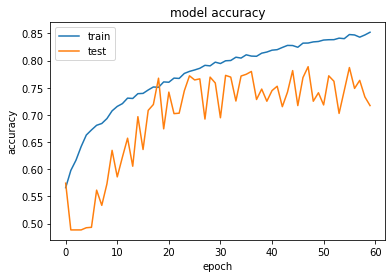

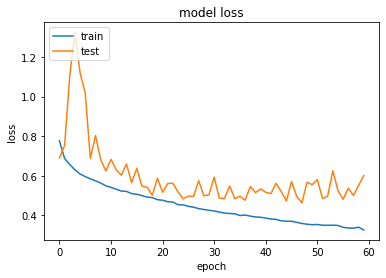

Ende des Versuchs: 


In [25]:
Tiefe = [2]
Batchgrose = [128]
Breite = [160]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-Charge-MuEl-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTrainingC,YTraining,
                              validation_data=(XValC,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

In [35]:
model = tf.keras.models.load_model("Perceptron-PMT-Charge-MuEl-val-acc_0.79.model")
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  1.7602712278422574
Test accuracy:  0.5920533


# Just Time

In [27]:
Tiefe = [1,2,3]
Batchgrose = [128,254]
Breite = [50,100,160,600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Time-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\TimePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingT.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            #model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTrainingT,YTraining,
                              validation_data=(XValT,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 8s 485us/sample - loss: 0.7348 - acc: 0.6366 - val_loss: 0.6626 - val_acc: 0.5520
Epoch 2/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6140 - acc: 0.6793 - val_loss: 0.9117 - val_acc: 0.4896
Epoch 3/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.5785 - acc: 0.7013 - val_loss: 0.9193 - val_acc: 0.4920
Epoch 4/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.5549 - acc: 0.7169 - val_loss: 0.7828 - val_acc: 0.5236
Epoch 5/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.5447 - acc: 0.7264 - val_loss: 0.6609 - val_acc: 0.5980
Epoch 6/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.5300 - acc: 0.7359 - val_loss: 0.5940 - val_acc: 0.6600
Epoch 7/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.5186 - acc: 0.7442 - val_loss: 0.

Epoch 29/30
17000/17000 [==============================] - 1s 86us/sample - loss: 0.3106 - acc: 0.8611 - val_loss: 0.6224 - val_acc: 0.7304
Epoch 30/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.3066 - acc: 0.8596 - val_loss: 0.6347 - val_acc: 0.7396
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 8s 484us/sample - loss: 0.6727 - acc: 0.6574 - val_loss: 1.0409 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.5921 - acc: 0.6964 - val_loss: 1.7078 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.5518 - acc: 0.7191 - val_loss: 1.7784 - val_acc: 0.4884
Epoch 4/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.5325 - acc: 0.7310 - val_loss: 1.4331 - val_acc: 0.4892
Epoch 5/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.5118 - acc: 0.7488 - val_loss: 

Epoch 27/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.1707 - acc: 0.9294 - val_loss: 0.8356 - val_acc: 0.7384
Epoch 28/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.1577 - acc: 0.9358 - val_loss: 0.8812 - val_acc: 0.7136
Epoch 29/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.1457 - acc: 0.9427 - val_loss: 0.8814 - val_acc: 0.7352
Epoch 30/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.1394 - acc: 0.9462 - val_loss: 0.8979 - val_acc: 0.7420
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 8s 454us/sample - loss: 0.7216 - acc: 0.6304 - val_loss: 0.7798 - val_acc: 0.4884
Epoch 2/30
17000/17000 [==============================] - 1s 43us/sample - loss: 0.6215 - acc: 0.6734 - val_loss: 0.8413 - val_acc: 0.4884
Epoch 3/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.5930 - acc: 0.6881 - val_loss

Epoch 25/30
17000/17000 [==============================] - 1s 48us/sample - loss: 0.3751 - acc: 0.8235 - val_loss: 0.5502 - val_acc: 0.7404
Epoch 26/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.3670 - acc: 0.8322 - val_loss: 0.5706 - val_acc: 0.7248
Epoch 27/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.3650 - acc: 0.8313 - val_loss: 0.5689 - val_acc: 0.7248
Epoch 28/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3577 - acc: 0.8344 - val_loss: 0.5652 - val_acc: 0.7300
Epoch 29/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3543 - acc: 0.8377 - val_loss: 0.5712 - val_acc: 0.7264
Epoch 30/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3459 - acc: 0.8428 - val_loss: 0.5751 - val_acc: 0.7336
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 8s 461us/sample - loss: 0.7191 - acc: 0.6405 - val_lo

Epoch 23/30
17000/17000 [==============================] - 1s 44us/sample - loss: 0.3095 - acc: 0.8616 - val_loss: 0.7036 - val_acc: 0.6924
Epoch 24/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.3006 - acc: 0.8680 - val_loss: 0.7266 - val_acc: 0.6932
Epoch 25/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.2862 - acc: 0.8732 - val_loss: 0.7502 - val_acc: 0.6976
Epoch 26/30
17000/17000 [==============================] - 1s 45us/sample - loss: 0.2753 - acc: 0.8816 - val_loss: 0.6990 - val_acc: 0.7160
Epoch 27/30
17000/17000 [==============================] - 1s 46us/sample - loss: 0.2598 - acc: 0.8881 - val_loss: 0.6349 - val_acc: 0.7464
Epoch 28/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.2485 - acc: 0.8924 - val_loss: 0.7335 - val_acc: 0.7116
Epoch 29/30
17000/17000 [==============================] - 1s 47us/sample - loss: 0.2431 - acc: 0.8949 - val_loss: 0.7165 - val_acc: 0.7288
Epoch 30/30
17000/17

17000/17000 [==============================] - 2s 115us/sample - loss: 0.2624 - acc: 0.8852 - val_loss: 0.6968 - val_acc: 0.7148
Epoch 18/30
17000/17000 [==============================] - 2s 112us/sample - loss: 0.2448 - acc: 0.8935 - val_loss: 0.6440 - val_acc: 0.7584
Epoch 19/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.2256 - acc: 0.9056 - val_loss: 0.6594 - val_acc: 0.7476
Epoch 20/30
17000/17000 [==============================] - 2s 117us/sample - loss: 0.2095 - acc: 0.9108 - val_loss: 0.6837 - val_acc: 0.7492
Epoch 21/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.2026 - acc: 0.9152 - val_loss: 0.7104 - val_acc: 0.7340
Epoch 22/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.1861 - acc: 0.9218 - val_loss: 0.7030 - val_acc: 0.7444
Epoch 23/30
17000/17000 [==============================] - 2s 114us/sample - loss: 0.1744 - acc: 0.9290 - val_loss: 0.8058 - val_acc: 0.7416
Epoch 24/30
17000/17000 [

Epoch 15/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.4485 - acc: 0.7852 - val_loss: 0.7120 - val_acc: 0.6256
Epoch 16/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.4414 - acc: 0.7911 - val_loss: 0.5959 - val_acc: 0.6820
Epoch 17/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4373 - acc: 0.7924 - val_loss: 0.6223 - val_acc: 0.6692
Epoch 18/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4302 - acc: 0.7978 - val_loss: 0.6649 - val_acc: 0.6436
Epoch 19/30
17000/17000 [==============================] - 1s 59us/sample - loss: 0.4212 - acc: 0.8028 - val_loss: 0.6322 - val_acc: 0.6672
Epoch 20/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4148 - acc: 0.8098 - val_loss: 0.6157 - val_acc: 0.6832
Epoch 21/30
17000/17000 [==============================] - 1s 58us/sample - loss: 0.4039 - acc: 0.8154 - val_loss: 0.6354 - val_acc: 0.6712
Epoch 22/30
17000/17

Epoch 13/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3696 - acc: 0.8319 - val_loss: 2.7849 - val_acc: 0.4908
Epoch 14/30
17000/17000 [==============================] - 1s 64us/sample - loss: 0.3573 - acc: 0.8376 - val_loss: 2.2040 - val_acc: 0.4956
Epoch 15/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.3427 - acc: 0.8445 - val_loss: 2.2024 - val_acc: 0.5024
Epoch 16/30
17000/17000 [==============================] - 1s 63us/sample - loss: 0.3259 - acc: 0.8534 - val_loss: 1.4748 - val_acc: 0.5396
Epoch 17/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.3068 - acc: 0.8652 - val_loss: 1.1895 - val_acc: 0.5892
Epoch 18/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2984 - acc: 0.8682 - val_loss: 0.9851 - val_acc: 0.6320
Epoch 19/30
17000/17000 [==============================] - 1s 61us/sample - loss: 0.2737 - acc: 0.8814 - val_loss: 1.2997 - val_acc: 0.5940
Epoch 20/30
17000/17

17000/17000 [==============================] - 2s 139us/sample - loss: 0.4401 - acc: 0.7915 - val_loss: 1.9951 - val_acc: 0.4928
Epoch 8/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.4170 - acc: 0.8040 - val_loss: 1.5630 - val_acc: 0.5080
Epoch 9/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.3974 - acc: 0.8191 - val_loss: 1.1892 - val_acc: 0.5672
Epoch 10/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.3809 - acc: 0.8285 - val_loss: 0.9881 - val_acc: 0.6164
Epoch 11/30
17000/17000 [==============================] - 2s 138us/sample - loss: 0.3575 - acc: 0.8392 - val_loss: 0.7492 - val_acc: 0.6672
Epoch 12/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.3345 - acc: 0.8497 - val_loss: 0.7223 - val_acc: 0.6720
Epoch 13/30
17000/17000 [==============================] - 3s 148us/sample - loss: 0.3154 - acc: 0.8585 - val_loss: 0.8618 - val_acc: 0.6624
Epoch 14/30
17000/17000 [==

Epoch 5/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5662 - acc: 0.7084 - val_loss: 1.0508 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5457 - acc: 0.7231 - val_loss: 1.3428 - val_acc: 0.4884
Epoch 7/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5333 - acc: 0.7326 - val_loss: 1.5300 - val_acc: 0.4884
Epoch 8/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.5164 - acc: 0.7439 - val_loss: 1.5141 - val_acc: 0.4884
Epoch 9/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.5076 - acc: 0.7501 - val_loss: 1.4607 - val_acc: 0.4888
Epoch 10/30
17000/17000 [==============================] - 1s 77us/sample - loss: 0.4970 - acc: 0.7600 - val_loss: 1.2853 - val_acc: 0.4944
Epoch 11/30
17000/17000 [==============================] - 1s 78us/sample - loss: 0.4852 - acc: 0.7667 - val_loss: 1.0596 - val_acc: 0.5192
Epoch 12/30
17000/17000 [

Epoch 3/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.5837 - acc: 0.6981 - val_loss: 0.7250 - val_acc: 0.4888
Epoch 4/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.5455 - acc: 0.7201 - val_loss: 1.4696 - val_acc: 0.4884
Epoch 5/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.5157 - acc: 0.7413 - val_loss: 2.2129 - val_acc: 0.4884
Epoch 6/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.4877 - acc: 0.7634 - val_loss: 2.4840 - val_acc: 0.4884
Epoch 7/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.4655 - acc: 0.7773 - val_loss: 3.0106 - val_acc: 0.4884
Epoch 8/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.4518 - acc: 0.7830 - val_loss: 2.6811 - val_acc: 0.4884
Epoch 9/30
17000/17000 [==============================] - 1s 75us/sample - loss: 0.4313 - acc: 0.7945 - val_loss: 3.1345 - val_acc: 0.4884
Epoch 10/30
17000/17000 [==

Ein Netz mit den besten Parametern speichern

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_114 (Flatten)        (None, 160)               0         
_________________________________________________________________
batch_normalization_382 (Bat (None, 160)               640       
_________________________________________________________________
dense_311 (Dense)            (None, 50)                8050      
_________________________________________________________________
batch_normalization_383 (Bat (None, 50)                200       
_________________________________________________________________
dropout_197 (Dropout)        (None, 50)                0         
_________________________________________________________________
batch_normalization_384 (Bat (None, 50)                200   

16768/17000 [============================>.] - ETA: 0s - loss: 0.4310 - acc: 0.8020
Epoch 00021: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 132us/sample - loss: 0.4302 - acc: 0.8025 - val_loss: 0.5230 - val_acc: 0.7504
Epoch 22/60
16512/17000 [============================>.] - ETA: 0s - loss: 0.4289 - acc: 0.8006
Epoch 00022: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 130us/sample - loss: 0.4292 - acc: 0.8005 - val_loss: 0.5346 - val_acc: 0.7328
Epoch 23/60
16640/17000 [============================>.] - ETA: 0s - loss: 0.4244 - acc: 0.8032
Epoch 00023: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 131us/sample - loss: 0.4253 - acc: 0.8027 - val_loss: 0.5459 - val_acc: 0.7284
Epoch 24/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.4242 - acc: 0.8018
Epoch 00024: val_acc did not improve from 0.76320
17000/17000 [============================

Epoch 51/60
16896/17000 [============================>.] - ETA: 0s - loss: 0.3539 - acc: 0.8429
Epoch 00051: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 127us/sample - loss: 0.3545 - acc: 0.8423 - val_loss: 0.5845 - val_acc: 0.7380
Epoch 52/60
16640/17000 [============================>.] - ETA: 0s - loss: 0.3523 - acc: 0.8431
Epoch 00052: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 130us/sample - loss: 0.3528 - acc: 0.8434 - val_loss: 0.5706 - val_acc: 0.7372
Epoch 53/60
16896/17000 [============================>.] - ETA: 0s - loss: 0.3490 - acc: 0.8475
Epoch 00053: val_acc did not improve from 0.76320
17000/17000 [==============================] - 2s 127us/sample - loss: 0.3487 - acc: 0.8476 - val_loss: 0.5865 - val_acc: 0.7336
Epoch 54/60
16640/17000 [============================>.] - ETA: 0s - loss: 0.3465 - acc: 0.8476
Epoch 00054: val_acc did not improve from 0.76320
17000/17000 [================

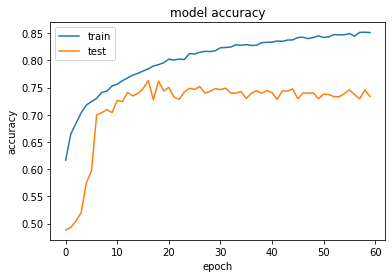

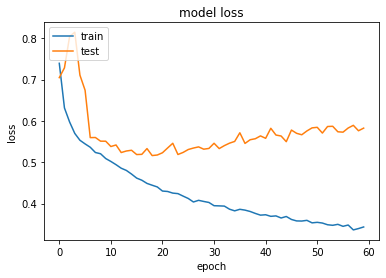

Ende des Versuchs: 


In [28]:
Tiefe = [2]
Batchgrose = [128]
Breite = [50]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Time-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTrainingT.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-Time-MuEl-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTrainingT,YTraining,
                              validation_data=(XValT,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

In [37]:
model = tf.keras.models.load_model("Perceptron-PMT-Time-MuEl-val-acc_0.76.model")
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.8165153689822228
Test accuracy:  0.5234452


# PMT Charge+Time

In [30]:
Tiefe = [1,2,3]
Batchgrose = [128]
Breite = [50,160,300,600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PMTPerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            #model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 12s 695us/sample - loss: 0.6689 - acc: 0.6681 - val_loss: 0.6782 - val_acc: 0.5124
Epoch 2/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.5669 - acc: 0.7113 - val_loss: 0.9835 - val_acc: 0.4892
Epoch 3/30
17000/17000 [==============================] - 2s 109us/sample - loss: 0.5365 - acc: 0.7302 - val_loss: 0.8793 - val_acc: 0.5092
Epoch 4/30
17000/17000 [==============================] - 2s 110us/sample - loss: 0.5162 - acc: 0.7425 - val_loss: 0.7344 - val_acc: 0.5776
Epoch 5/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.4953 - acc: 0.7589 - val_loss: 0.5887 - val_acc: 0.6696
Epoch 6/30
17000/17000 [==============================] - 2s 109us/sample - loss: 0.4781 - acc: 0.7687 - val_loss: 0.5837 - val_acc: 0.6784
Epoch 7/30
17000/17000 [==============================] - 2s 122us/sample - loss: 0.4581 - acc: 0.7811 - val_l

17000/17000 [==============================] - 2s 111us/sample - loss: 0.0853 - acc: 0.9696 - val_loss: 0.6997 - val_acc: 0.8152
Epoch 26/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.0817 - acc: 0.9685 - val_loss: 0.7067 - val_acc: 0.8048
Epoch 27/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.0680 - acc: 0.9759 - val_loss: 0.7129 - val_acc: 0.8136
Epoch 28/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.0702 - acc: 0.9741 - val_loss: 0.7497 - val_acc: 0.8004
Epoch 29/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.0684 - acc: 0.9754 - val_loss: 0.7484 - val_acc: 0.8076
Epoch 30/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.0649 - acc: 0.9760 - val_loss: 0.7573 - val_acc: 0.8136
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 13s 742us/sample - loss: 0.6679 - acc: 0.6570 - val_loss: 0

17000/17000 [==============================] - 2s 140us/sample - loss: 0.1321 - acc: 0.9468 - val_loss: 0.5975 - val_acc: 0.8276
Epoch 20/30
17000/17000 [==============================] - 2s 141us/sample - loss: 0.1191 - acc: 0.9524 - val_loss: 0.6212 - val_acc: 0.8224
Epoch 21/30
17000/17000 [==============================] - 2s 140us/sample - loss: 0.1123 - acc: 0.9547 - val_loss: 0.6196 - val_acc: 0.8316
Epoch 22/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.1026 - acc: 0.9589 - val_loss: 0.6474 - val_acc: 0.8264
Epoch 23/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.0924 - acc: 0.9625 - val_loss: 0.6571 - val_acc: 0.8268
Epoch 24/30
17000/17000 [==============================] - 2s 143us/sample - loss: 0.0885 - acc: 0.9662 - val_loss: 0.6976 - val_acc: 0.8064
Epoch 25/30
17000/17000 [==============================] - 3s 151us/sample - loss: 0.0867 - acc: 0.9658 - val_loss: 0.6842 - val_acc: 0.8380
Epoch 26/30
17000/17000 [

17000/17000 [==============================] - 3s 166us/sample - loss: 0.2210 - acc: 0.9072 - val_loss: 0.5511 - val_acc: 0.7940
Epoch 14/30
17000/17000 [==============================] - 3s 166us/sample - loss: 0.2030 - acc: 0.9150 - val_loss: 0.5121 - val_acc: 0.8024
Epoch 15/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.1817 - acc: 0.9252 - val_loss: 0.5185 - val_acc: 0.8148
Epoch 16/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.1682 - acc: 0.9305 - val_loss: 0.5292 - val_acc: 0.8156
Epoch 17/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.1530 - acc: 0.9384 - val_loss: 0.5765 - val_acc: 0.8144
Epoch 18/30
17000/17000 [==============================] - 3s 169us/sample - loss: 0.1302 - acc: 0.9466 - val_loss: 0.6154 - val_acc: 0.8188
Epoch 19/30
17000/17000 [==============================] - 3s 171us/sample - loss: 0.1258 - acc: 0.9526 - val_loss: 0.5901 - val_acc: 0.8260
Epoch 20/30
17000/17000 [

Ein Netz mit den besten Parametern speichern

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 2)]       0         
_________________________________________________________________
flatten_128 (Flatten)        (None, 320)               0         
_________________________________________________________________
batch_normalization_438 (Bat (None, 320)               1280      
_________________________________________________________________
dense_353 (Dense)            (None, 600)               192600    
_________________________________________________________________
batch_normalization_439 (Bat (None, 600)               2400      
_________________________________________________________________
dropout_225 (Dropout)        (None, 600)               0         
_________________________________________________________________
batch_normalization_440 (Bat (None, 600)               2400  

Epoch 23/60
16640/17000 [============================>.] - ETA: 0s - loss: 0.0959 - acc: 0.9629
Epoch 00023: val_acc did not improve from 0.83080
17000/17000 [==============================] - 3s 149us/sample - loss: 0.0963 - acc: 0.9626 - val_loss: 0.6393 - val_acc: 0.8008
Epoch 24/60
16896/17000 [============================>.] - ETA: 0s - loss: 0.0983 - acc: 0.9616
Epoch 00024: val_acc did not improve from 0.83080
17000/17000 [==============================] - 3s 148us/sample - loss: 0.0980 - acc: 0.9617 - val_loss: 0.6116 - val_acc: 0.8216
Epoch 25/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.0870 - acc: 0.9658
Epoch 00025: val_acc did not improve from 0.83080
17000/17000 [==============================] - 2s 147us/sample - loss: 0.0873 - acc: 0.9656 - val_loss: 0.6499 - val_acc: 0.8120
Epoch 26/60
16896/17000 [============================>.] - ETA: 0s - loss: 0.0879 - acc: 0.9657
Epoch 00026: val_acc did not improve from 0.83080
17000/17000 [================

Epoch 53/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.0356 - acc: 0.9865
Epoch 00053: val_acc did not improve from 0.83360
17000/17000 [==============================] - 2s 143us/sample - loss: 0.0354 - acc: 0.9866 - val_loss: 0.9683 - val_acc: 0.8136
Epoch 54/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.0287 - acc: 0.9889
Epoch 00054: val_acc did not improve from 0.83360
17000/17000 [==============================] - 2s 142us/sample - loss: 0.0288 - acc: 0.9889 - val_loss: 0.9661 - val_acc: 0.8204
Epoch 55/60
16768/17000 [============================>.] - ETA: 0s - loss: 0.0312 - acc: 0.987 - ETA: 0s - loss: 0.0308 - acc: 0.9880
Epoch 00055: val_acc did not improve from 0.83360
17000/17000 [==============================] - 2s 142us/sample - loss: 0.0317 - acc: 0.9877 - val_loss: 0.9809 - val_acc: 0.8096
Epoch 56/60
16640/17000 [============================>.] - ETA: 0s - loss: 0.0344 - acc: 0.9877
Epoch 00056: val_acc did not improve from

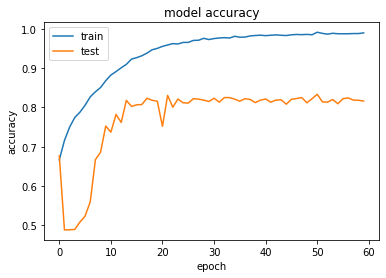

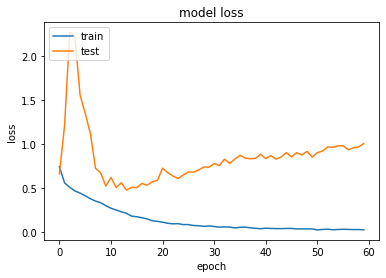

Ende des Versuchs: 


In [32]:
Tiefe = [2]
Batchgrose = [128]
Breite = [600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\ChargePerceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                x= layers.BatchNormalization()(x)
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])
            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-PMT-MuEl-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 60)


            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

print("Ende des Versuchs: ")

In [33]:
model = tf.keras.models.load_model("Perceptron-PMT-MuEl-val-acc_0.83.model")
score = model.evaluate([XTest,XTest], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.897076064307033
Test accuracy:  0.8336624


# Just LAPPD

In [39]:
XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))
YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))


In [40]:
training_data = list(zip(XL, YL))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(17000, 9, 24, 2) (2500, 9, 24, 2) (4052, 9, 24, 2)


In [42]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

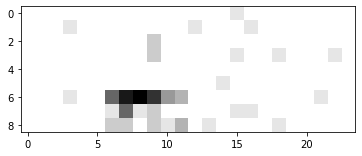

In [55]:
plt.imshow(XTrainingC[90,:,:,0], cmap='binary', interpolation='None')

In [77]:
inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
x= layers.Flatten()(inputs)

x= layers.BatchNormalization()(x)
x = layers.Dense(150, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x= layers.BatchNormalization()(x)
x = layers.Dense(100, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)


#outputs = layers.Dense(1,activation='sigmoid')(x)
outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs, outputs, name='Model')

model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_147 (Flatten)        (None, 160)               0         
_________________________________________________________________
batch_normalization_396 (Bat (None, 160)               640       
_________________________________________________________________
dense_364 (Dense)            (None, 150)               24150     
_________________________________________________________________
batch_normalization_397 (Bat (None, 150)               600       
_________________________________________________________________
dropout_429 (Dropout)        (None, 150)               0         
_________________________________________________________________
batch_normalization_398 (Bat (None, 150)               600   

Train on 17000 samples, validate on 2500 samples
Epoch 1/60
17000/17000 [==============================] - 18s 1ms/sample - loss: 0.7725 - acc: 0.5490 - val_loss: 0.6910 - val_acc: 0.5080
Epoch 2/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.6965 - acc: 0.5804 - val_loss: 0.6971 - val_acc: 0.4972
Epoch 3/60
17000/17000 [==============================] - 4s 208us/sample - loss: 0.6659 - acc: 0.5988 - val_loss: 0.8294 - val_acc: 0.4916
Epoch 4/60
17000/17000 [==============================] - 4s 209us/sample - loss: 0.6433 - acc: 0.6241 - val_loss: 1.2116 - val_acc: 0.4924
Epoch 5/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.6168 - acc: 0.6520 - val_loss: 1.0946 - val_acc: 0.4980
Epoch 6/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.5943 - acc: 0.6675 - val_loss: 1.0440 - val_acc: 0.5052
Epoch 7/60
17000/17000 [==============================] - 4s 210us/sample - loss: 0.5803 - acc: 0.6821 - val_los

Epoch 59/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.3411 - acc: 0.8453 - val_loss: 0.6283 - val_acc: 0.7140
Epoch 60/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.3342 - acc: 0.8488 - val_loss: 0.6639 - val_acc: 0.7080
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


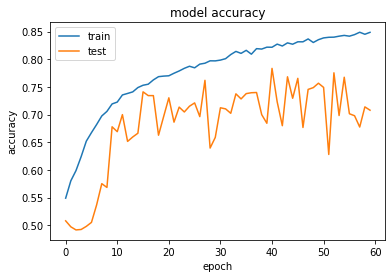

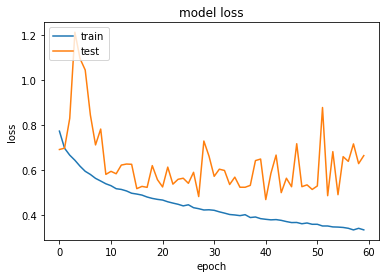

Ende des Versuchs: 


In [78]:
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        #tensorboard 
            ],
          epochs= 60)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [66]:
dense_layers = [0,1,2,3]


#for dense_layer in dense_layers:


NAME ="LAPPD-Charge-3x3-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
tensorboard = TensorBoard(log_dir = 'logs\LAPPDPerceptron\{}'.format(NAME))


model = Sequential()
model.add(Flatten())

for l in range(3):
    model.add(Dense(512-l*50 ,activation="relu" ))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
#model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

#adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
model.compile(loss="binary_crossentropy",
             optimizer="adam",
              metrics=['accuracy']
             )   
#filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model.summary()
#         history=model.fit(XTrainingC,YTraining,
#       validation_data=(XValC,Yval)
#       ,batch_size=100,
#         shuffle=True,
#         class_weight='balanced',
#         callbacks=[
#                     #monitor,
#                     #checkpoint,
#                     tensorboard 
#         ],
#       epochs= 30)


W0514 14:02:27.200614  2760 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17000 samples, validate on 2500 samples
Epoch 1/40
17000/17000 [==============================] - 4s 258us/sample - loss: 0.8613 - acc: 0.5003 - val_loss: 0.7572 - val_acc: 0.4956
Epoch 2/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7364 - acc: 0.4989 - val_loss: 0.7997 - val_acc: 0.4956
Epoch 3/40
17000/17000 [==============================] - 2s 128us/sample - loss: 0.7093 - acc: 0.5022 - val_loss: 0.7038 - val_acc: 0.4956
Epoch 4/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7009 - acc: 0.5011 - val_loss: 0.6967 - val_acc: 0.4956
Epoch 5/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6969 - acc: 0.4987 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 6/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6950 - acc: 0.5035 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 7/40
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6942 - acc: 0.5044 - val_lo

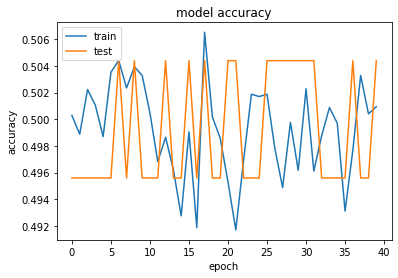

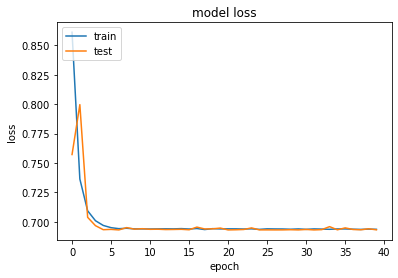

Ende des Versuchs: 


In [44]:
history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [38]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_18.05_PMT.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_18.05_PMT.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [41]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

In [55]:
#Combined
model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


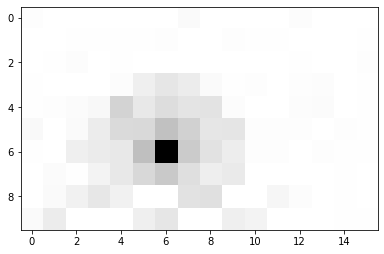

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [87]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTestC, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[1772  201]
 [  94 1985]]


In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[0.89812468 0.10187532]
 [0.04521405 0.95478595]]


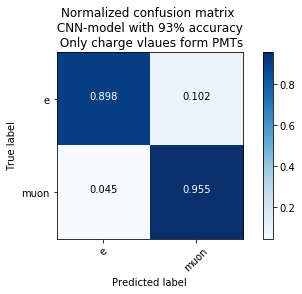

In [89]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = ["e", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Only charge vlaues form PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


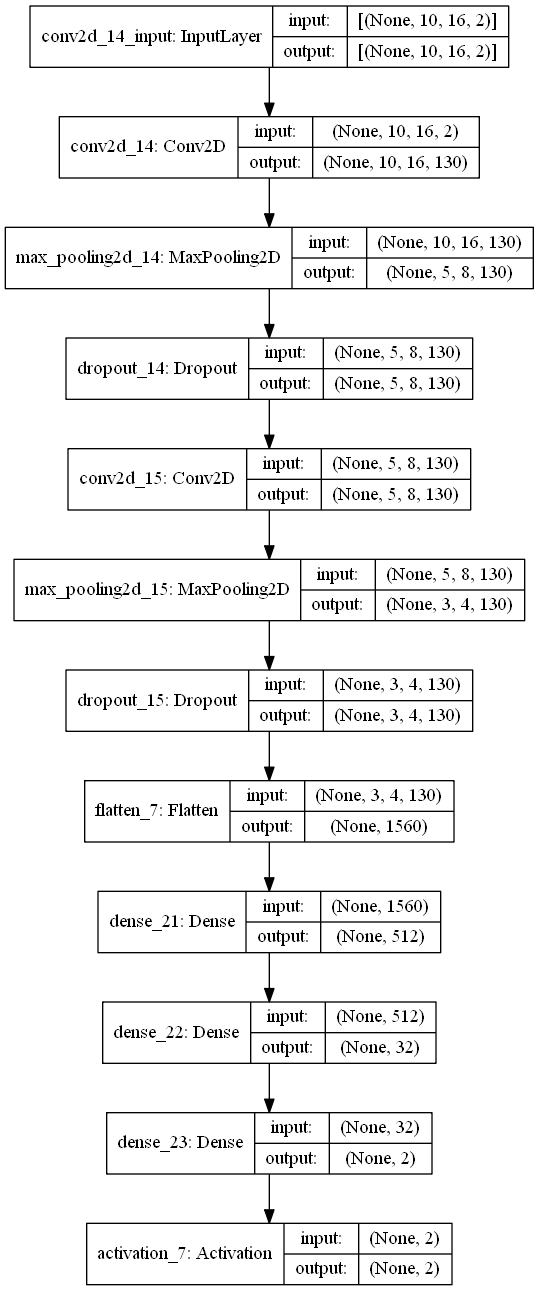

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


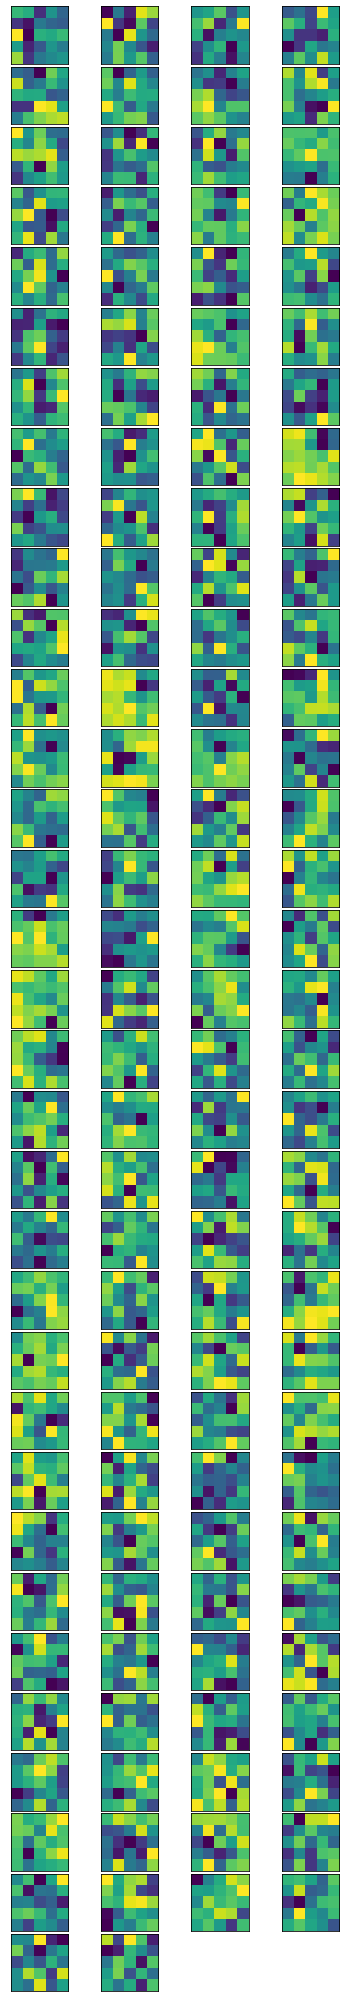

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


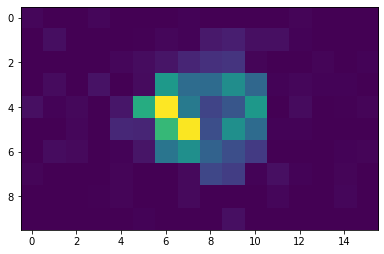

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

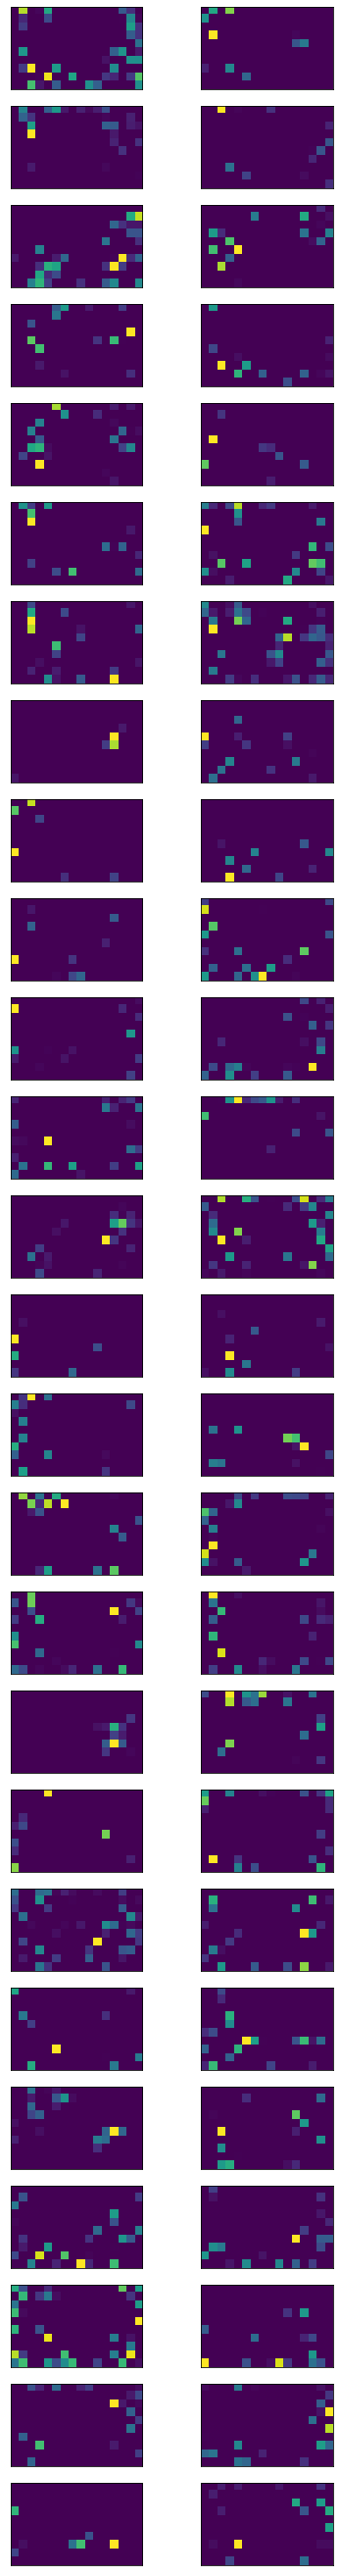

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
